# <div style="display: flex; justify-content: center; background-color:#fefae0; font-family:Times New Roman; color:#bc6c25; padding: 10px; line-height: 1; border-radius: 70px; margin-bottom: 0em; text-align: center; font-size: 80px; border-style: solid; border-color: #fefae0; font-weight: bold;">Dogs VS. Cats</div>

<br>    
<p style="text-align: center;">
<img src="Images\CatVsDog.jpeg" style='width: 900px; height: 700px;'>
</p>    

# <div style="background-color:#fefae0; font-family:Times New Roman; color:#bc6c25; padding: 10px; line-height: 1; border-radius: 70px; margin-bottom: 0em; text-align: center; font-size: 40px; border-style: solid; border-color: #fefae0; font-weight: bold;"> Importing Necessary Libraries</div>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from joblib import dump

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#fefae0; font-size:200%; font-weight: 500; color:#bc6c25; overflow:hidden;">Loading `VGG16`</span>

In [2]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#fefae0; font-size:200%; font-weight: 500; color:#bc6c25; overflow:hidden;">Defining Some Nescessary Functions</span>

In [3]:
def display_sample_images(data_dir, num_images=10):

    image_files = sorted(os.listdir(data_dir))
    
    selected_images = np.random.choice(image_files, size=num_images, replace=False)
    
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))

    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(data_dir, img_name)
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        row = i // 5
        col = i % 5
        axes[row, col].imshow(img_rgb)
        axes[row, col].axis('off')
        axes[row, col].set_title("Cat" if 'cat' in img_name else "Dog")
    
    plt.tight_layout()
    plt.show()

In [4]:
def load_images_from_folder(folder, img_size=(128, 128)):
    images = []
    labels = []
    
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        
        if img is not None:
            img = cv2.resize(img, img_size)  
            img = img_to_array(img)  
            images.append(img)

            if 'cat' in filename:
                labels.append(0)  # 0 for cat
            elif 'dog' in filename:
                labels.append(1)  # 1 for dog

    return np.array(images), np.array(labels)

In [5]:
def load_dataset(data_dir):
    X, y = load_images_from_folder(data_dir)
    print(f"Loaded {len(X)} images and {len(y)} labels from {data_dir}")
    return X, y

In [6]:
def extract_vgg_features(images):
    images = preprocess_input(images)  
    features = vgg16.predict(images)   
    return features.reshape(features.shape[0], -1)  

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#fefae0; font-size:200%; font-weight: 500; color:#bc6c25; overflow:hidden;">Displaying Random Images</span>

Displaying some sample images from the training data...


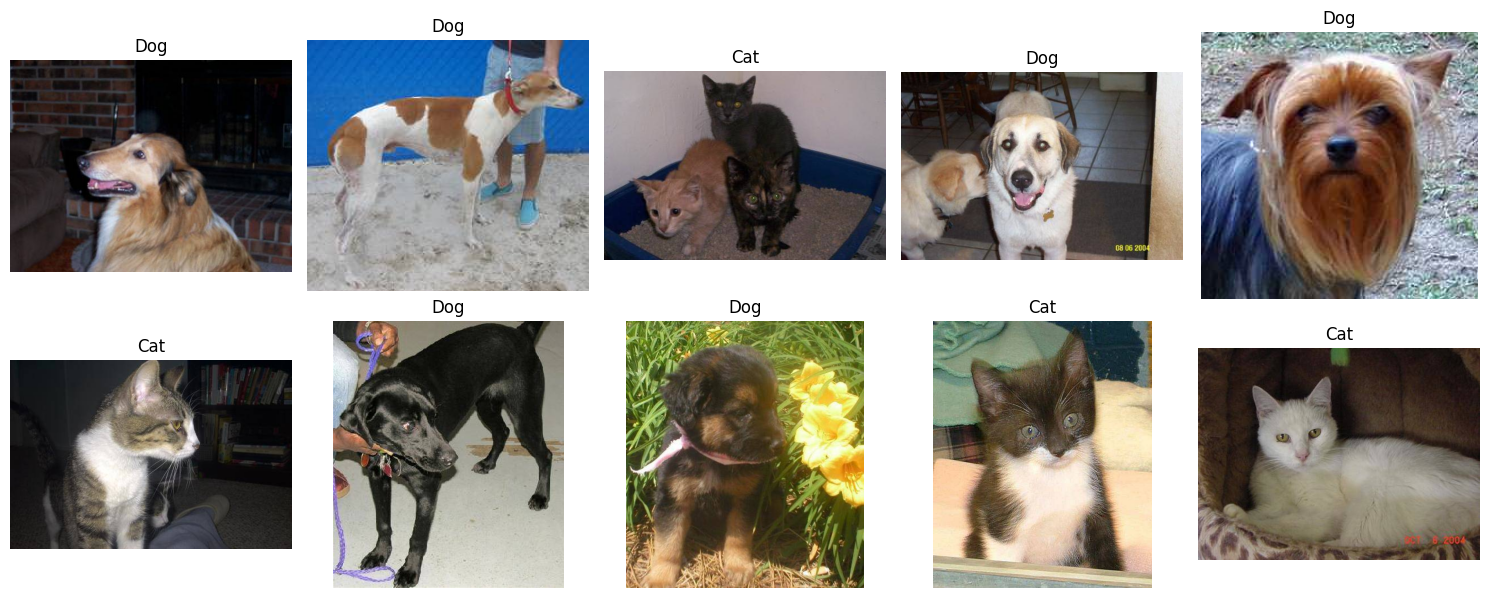

In [61]:
print("Displaying some sample images from the training data...")
display_sample_images('Data/train')

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#fefae0; font-size:200%; font-weight: 500; color:#bc6c25; overflow:hidden;">Loading Training & Testing Sets</span>

In [8]:
print("Loading training and test datasets...")
X_train, y_train = load_dataset('Data/train')
X_test, _ = load_images_from_folder('Data/test1')

Loading training and test datasets...
Loaded 25000 images and 25000 labels from Data/train


<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#fefae0; font-size:200%; font-weight: 500; color:#bc6c25; overflow:hidden;">Features Extraction Using `VGG16`</span>

In [9]:
print("Extracting features using VGG16...")
X_train_vgg = extract_vgg_features(X_train)

X_train_vgg, X_valid_vgg, y_train, y_valid = train_test_split(X_train_vgg, y_train, test_size=0.2, random_state=42)

Extracting features using VGG16...
782/782 ━━━━━━━━━━━━━━━━━━━━ 358s 455ms/step


<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#fefae0; font-size:200%; font-weight: 500; color:#bc6c25; overflow:hidden;">Fitting `SVC`</span>

In [10]:
print("Training SVM classifier...")
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_vgg, y_train)

Training SVM classifier...


SVC(kernel='linear')

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#fefae0; font-size:200%; font-weight: 500; color:#bc6c25; overflow:hidden;">Model Evaluation</span>

In [11]:
print("Evaluating on validation data...")   
y_valid_pred = svm_model.predict(X_valid_vgg)
print("Validation Accuracy:", accuracy_score(y_valid, y_valid_pred))
print(classification_report(y_valid, y_valid_pred, target_names=['Cats', 'Dogs']))

Evaluating on validation data...
Validation Accuracy: 0.9434
              precision    recall  f1-score   support

        Cats       0.95      0.94      0.94      2515
        Dogs       0.94      0.95      0.94      2485

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#fefae0; font-size:200%; font-weight: 500; color:#bc6c25; overflow:hidden;">Evaluating On Random Samples From The Test Data</span>

In [43]:
def evaluate_on_random_samples(X_test, num_samples=5):
    indices = np.random.choice(len(X_test), num_samples, replace=False)
    sample_images = X_test[indices]

    sample_images_resized = np.array([cv2.resize(img, (128, 128)) for img in sample_images])
    sample_features = extract_vgg_features(sample_images_resized)

    sample_predictions = svm_model.predict(sample_features)

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for i, img in enumerate(sample_images):
        img_rgb = cv2.cvtColor(img.astype('uint8'), cv2.COLOR_BGR2RGB)
        axes[i].imshow(img_rgb)
        axes[i].axis('off')
        axes[i].set_title("Predicted: " + ("Dog" if sample_predictions[i] == 1 else "Cat"))

    plt.tight_layout()
    plt.show()

Evaluating on random samples from the test data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


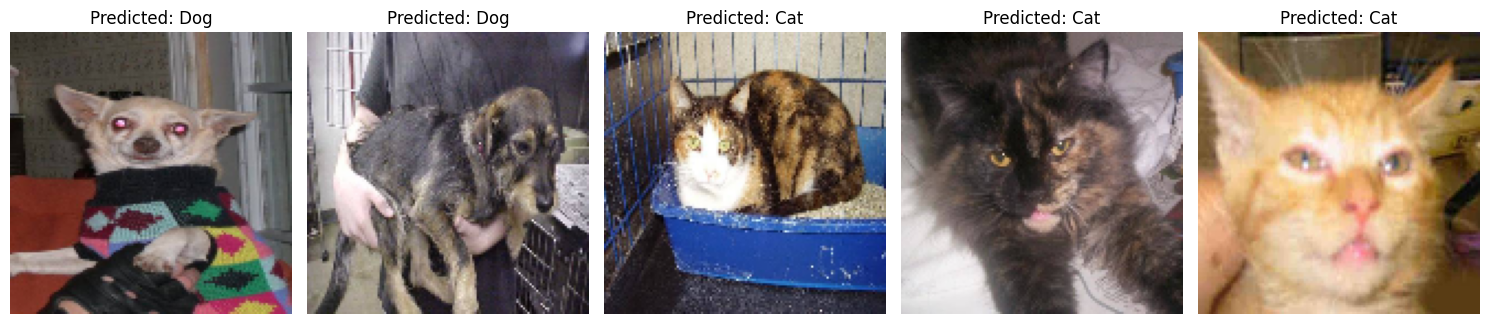

In [63]:
print("Evaluating on random samples from the test data...")
evaluate_on_random_samples(X_test, num_samples=5)

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#fefae0; font-size:200%; font-weight: 500; color:#bc6c25; overflow:hidden;">Saving The Model</span>

In [47]:
dump(svm_model, 'Model/cats_dogs_svm_model_vgg16.pkl')
print("Model saved successfully!")

Model saved successfully!


<body>
    <center>
        <div style="font-family: Comic Sans MS; background-color: #fefae0; color: #bc6c25; padding: 12px; line-height: 1; font-weight: bold; font-size: 50px; border-style: solid; border-color: dark green;">
            By: Mohamed Ghannnam
        </div>
    </center>
    <center>
        <div style="font-family: Trebuchet MS; background-color: #fefae0; color: #bc6c25; padding: 12px; line-height: 1; font-weight: bold; font-size: 50px; border-style: solid; border-color: dark green;">
            Thank You!
        </div>
        <div style="font-family: Trebuchet MS; background-color: #fefae0; color: #bc6c25; padding: 12px; line-height: 1; font-weight: bold; font-size: 50px; border-style: solid; border-color: dark green; margin-top: 20px;">
            <a href="https://www.linkedin.com/in/mohamedghannnam/" style="text-decoration: none; color: #bc6c25;">
                <i class="fa-brands fa-linkedin" style="font-size: 50px; vertical-align: middle; color: #bc6c25;"></i> Click Here ==> LinkedIn 
            </a>
        </div>
    </center>
</body>
